In [18]:
import pandas as pd
import pickle
import imblearn
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
class DataframeContainer:
    def __init__(self, name, filanemCsv):
        self.name = name
        self.dataframe = pd.read_csv(filanemCsv, sep=';')
        self.dataframe = self.dataframe[self.dataframe['Text'] != """"""]
        
    def filter_dataframe(self):
        count = 0
        for ind, row in self.dataframe.iterrows():
            if row['Text'] == """""":
                print("empty")
                continue
            if self.name != str(row['Label']):
                count += 1
                row['Label'] = 'Other'
                row['Text'] = row['Text'].replace('\n', ' ').replace(',', ' ').lower()
        print(f'{self.name} filtered {count} rows')  
        
    def separate_x_y(self):
        self.df_X, self.df_y = self.dataframe['Text'], self.dataframe['Label']
        unique, counts = np.unique(self.df_y , return_counts=True)
        plt.bar(unique, counts, 1)
        plt.title('Class Frequency')
        plt.xlabel('Class')
        plt.ylabel('Frequency')
        plt.show()

    def predict(self):
        self.y_pred = self.clf.predict(self.df_X)

    def confusion_matrix(self):
        y_unique = self.df_y.unique()
        cm = confusion_matrix(self.df_y, self.y_pred, labels=y_unique)
        cm_df = pd.DataFrame(cm, index = [y_unique], columns = [y_unique])
        plt.figure(figsize=(5,4))
        sns.heatmap(cm_df, annot=True, fmt='d')
        plt.title('Confusion Matrix')
        plt.ylabel('Actual Values')
        plt.xlabel('Predicted Values')
        plt.show()
        print(f"Accuracy {self.name} : {metrics.accuracy_score(self.df_y, self.y_pred)}")
        m = metrics.precision_recall_fscore_support(self.df_y, self.y_pred, average='macro')
        print(f"Precision {self.name} : {m[0]} \nRecall {self.name} : {m[1]} \nF1-score {self.name} : {m[2]}")

    def save_pickle(self):
        filename = self.name + '.sav'
        pickle.dump(self.clf, open(filename, 'wb'))
    def load_pickle(self):
        filename = 'pickles/undersampler1/' + self.name + '.sav'
        self.clf = pickle.load(open(filename, 'rb'))

Audio filtered 2314 rows


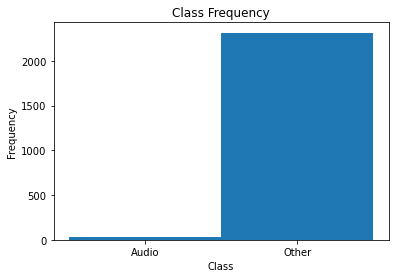

Computer Vision filtered 1318 rows


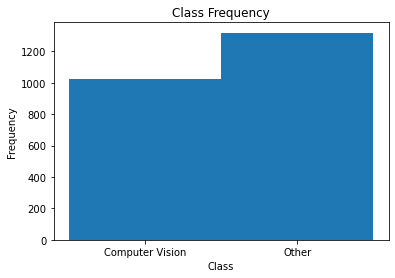

Graphs filtered 2286 rows


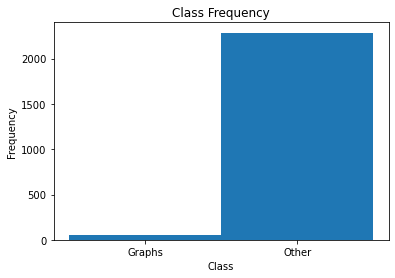

Natural Language Processing filtered 2111 rows


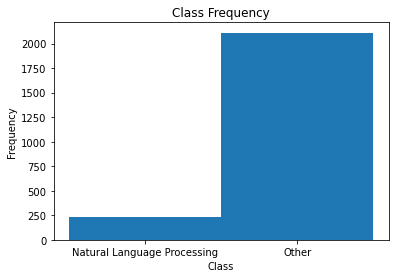

Reinforcement Learning filtered 2205 rows


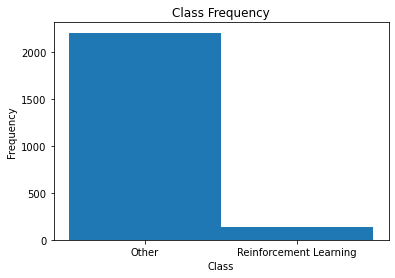

Sequential filtered 2271 rows


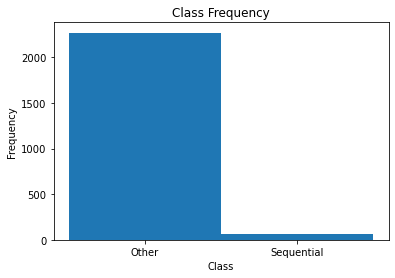

General filtered 1535 rows


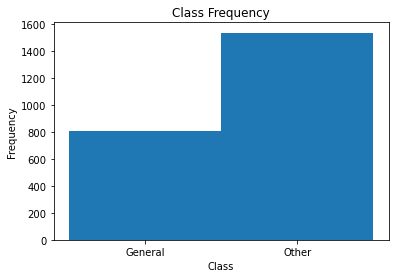

In [23]:
names_list = ["Audio", "Computer Vision", "Graphs", "Natural Language Processing", "Reinforcement Learning", "Sequential", "General"]
dataframecontainers_list = [DataframeContainer(name, 'dataset/somef_data.csv') for name in names_list]
for container in dataframecontainers_list:
    container.load_pickle()
    container.filter_dataframe()
    container.separate_x_y()

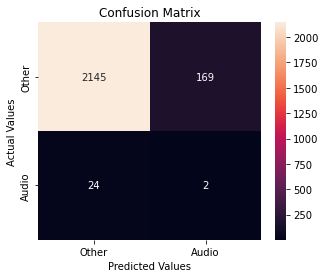

Accuracy Audio : 0.9175213675213675
Precision Audio : 0.5003154497585596 
Recall Audio : 0.5019446845289542 
F1-score Audio : 0.4886265202666361


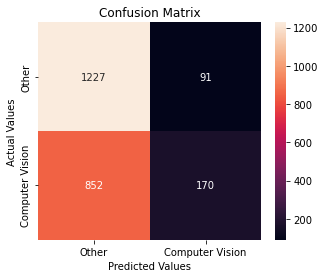

Accuracy Computer Vision : 0.597008547008547
Precision Computer Vision : 0.6207642931780862 
Recall Computer Vision : 0.5486482513682297 
F1-score Computer Vision : 0.49370300831667757


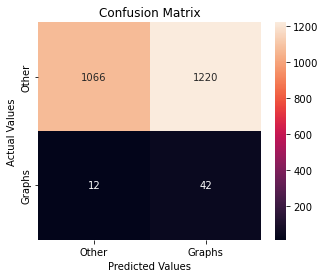

Accuracy Graphs : 0.4735042735042735
Precision Graphs : 0.5110743908570488 
Recall Graphs : 0.6220472440944882 
F1-score Graphs : 0.3487995547347383


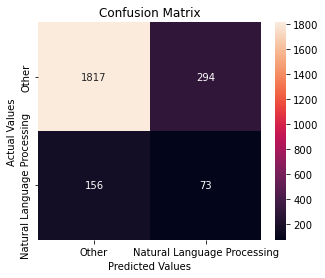

Accuracy Natural Language Processing : 0.8076923076923077
Precision Natural Language Processing : 0.5599213358541951 
Recall Natural Language Processing : 0.5897534023280012 
F1-score Natural Language Processing : 0.5673901754432094


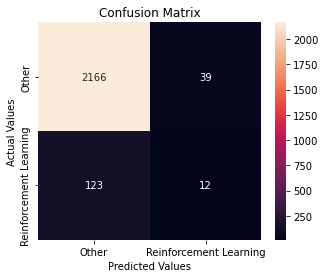

Accuracy Reinforcement Learning : 0.9307692307692308
Precision Reinforcement Learning : 0.5907794310384704 
Recall Reinforcement Learning : 0.5356009070294785 
F1-score Reinforcement Learning : 0.5464920969895344


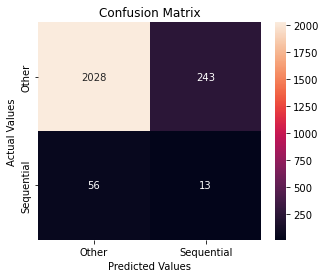

Accuracy Sequential : 0.8722222222222222
Precision Sequential : 0.5119549244241843 
Recall Sequential : 0.5407022380487432 
F1-score Sequential : 0.5056716417910448


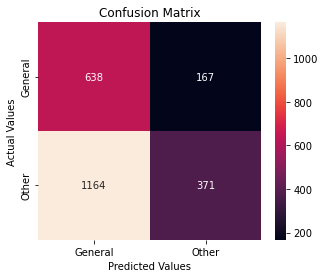

Accuracy General : 0.4311965811965812
Precision General : 0.5218210662254661 
Recall General : 0.5171201974629251 
F1-score General : 0.4236934180878932


In [24]:
for container in dataframecontainers_list:
    container.predict()
    container.confusion_matrix()

#Pickles/1
#Accuracy Audio : 0.9807692307692307
#Accuracy Computer Vision : 0.5914529914529915
#Accuracy General : 0.4388888888888889
#Accuracy Graphs : 0.9555555555555556
#Accuracy Natural Language Processing : 0.8807692307692307
#Accuracy Reinforcement Learning : 0.9393162393162393
#Accuracy Sequential : 0.9534188034188035



Computer Vision filtered 3 rows


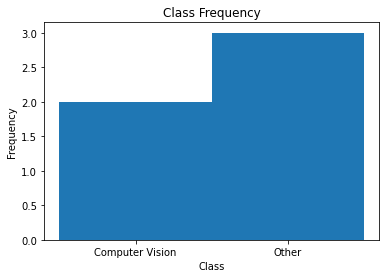

General filtered 3 rows


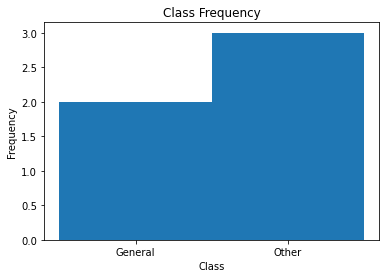

Natural Language Processing filtered 4 rows


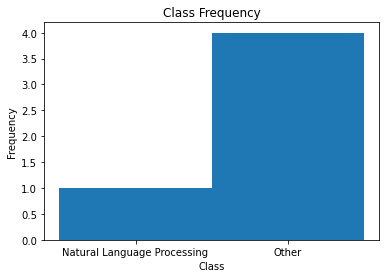

In [25]:
names_list = ["Computer Vision", "General", "Natural Language Processing"]
dataframecontainers_list = [DataframeContainer(name, 'dataset/free_text.csv') for name in names_list]
for container in dataframecontainers_list:
    container.load_pickle()
    container.filter_dataframe()
    container.separate_x_y()

['Other', 'Computer Vision', 'Computer Vision', 'Other', 'Other']
['Other' 'Computer Vision' 'Other' 'Other' 'Computer Vision']


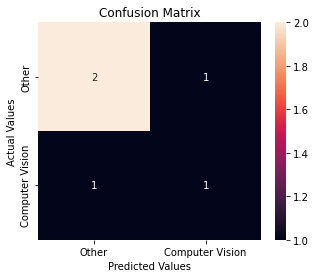

Accuracy Computer Vision : 0.6
Precision Computer Vision : 0.5833333333333333 
Recall Computer Vision : 0.5833333333333333 
F1-score Computer Vision : 0.5833333333333333
['General', 'Other', 'Other', 'Other', 'General']
['General' 'Other' 'General' 'General' 'General']


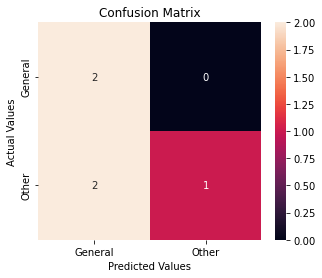

Accuracy General : 0.6
Precision General : 0.75 
Recall General : 0.6666666666666666 
F1-score General : 0.5833333333333333
['Other', 'Other', 'Other', 'Natural Language Processing', 'Other']
['Other' 'Other' 'Natural Language Processing'
 'Natural Language Processing' 'Other']


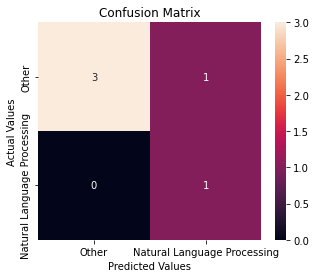

Accuracy Natural Language Processing : 0.8
Precision Natural Language Processing : 0.75 
Recall Natural Language Processing : 0.875 
F1-score Natural Language Processing : 0.7619047619047619


In [26]:
for container in dataframecontainers_list:
    container.predict()
    print(container.df_y.values.tolist())
    print(container.y_pred)
    container.confusion_matrix()